In [149]:
 import sys
 print(sys.executable) 

/opt/homebrew/Cellar/jupyterlab/4.3.4/libexec/bin/python


In [150]:
! /opt/homebrew/Cellar/jupyterlab/4.3.4/libexec/bin/python -m pip install -U scikit-learn scipy matplotlib

In [151]:
! /opt/homebrew/Cellar/jupyterlab/4.3.4/libexec/bin/python -m pip install -U matplotlib

In [152]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from pandas.core.common import random_state
from sklearn.linear_model import LinearRegression

In [153]:
# Get dataset
df_sal = pd.read_csv('Salary_Data.csv')
df_sal.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [154]:
# Describe data
df_sal.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


/var/folders/vy/_y3730xd3ldgvyy4lky3h20r0000gn/T/ipykernel_43073/3676038920.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_sal['Salary'])


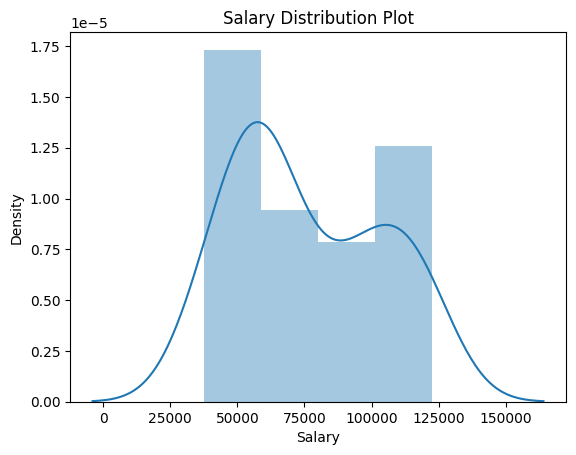

In [155]:
# Data distribution
plt.title('Salary Distribution Plot')
sns.distplot(df_sal['Salary'])
plt.show()

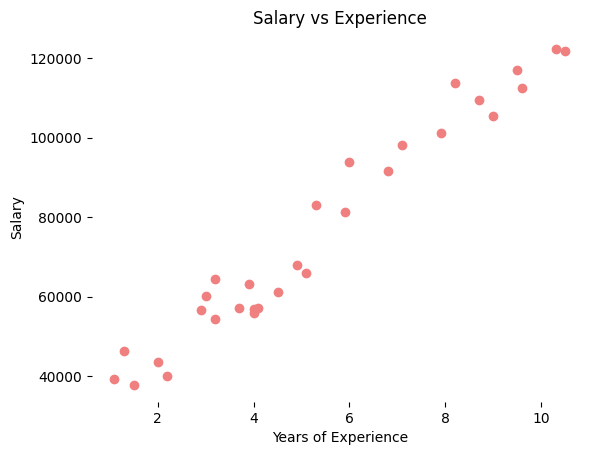

In [156]:
# Relationship between Salary and Experience
plt.scatter(df_sal['YearsExperience'], df_sal['Salary'], color = 'lightcoral')
plt.title('Salary vs Experience')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.box(False)
plt.show()


In [157]:
# Splitting variables
X = df_sal.iloc[:, :1]  # independent
y = df_sal. iloc[:, 1:]  # dependent

In [158]:
# Splitting dataset into test/train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [170]:
# Regressor model
regressor = LinearRegression()
regressor.fit(X, y)

LinearRegression()

In [171]:
# Regressor coefficients and intercept
print(f'Coefficient: {regressor.coef_}')
print(f'Intercept: {regressor.intercept_}')

Coefficient: [[9449.96232146]]
Intercept: [25792.20019867]


In [172]:
# so we bassicly used a pre-existing linear regression algorithm to fit our data.
# we split our data into X and Y componenent, and made a Training dataset with 80 percent of our data. The other 20 percent of our data was kept as a testing dataset

In [173]:
print(X)

    YearsExperience
0               1.1
1               1.3
2               1.5
3               2.0
4               2.2
5               2.9
6               3.0
7               3.2
8               3.2
9               3.7
10              3.9
11              4.0
12              4.0
13              4.1
14              4.5
15              4.9
16              5.1
17              5.3
18              5.9
19              6.0
20              6.8
21              7.1
22              7.9
23              8.2
24              8.7
25              9.0
26              9.5
27              9.6
28             10.3
29             10.5


In [174]:
print(y)


      Salary
0    39343.0
1    46205.0
2    37731.0
3    43525.0
4    39891.0
5    56642.0
6    60150.0
7    54445.0
8    64445.0
9    57189.0
10   63218.0
11   55794.0
12   56957.0
13   57081.0
14   61111.0
15   67938.0
16   66029.0
17   83088.0
18   81363.0
19   93940.0
20   91738.0
21   98273.0
22  101302.0
23  113812.0
24  109431.0
25  105582.0
26  116969.0
27  112635.0
28  122391.0
29  121872.0


In [175]:
def error(y, ypred):
    cost = np.sum((y - ypred)**2) / (2*len(y))
    return cost

In [176]:
def gradient_descent(x, y, iterations = 900, learningrate = 0.01, stopping_threshold = 1e-6):
    x = np.array(x)
    y = np.array(y)
    w = 0
    b = 0
    n = float(len(x))
    
    for i in range(iterations):
        y_predicted = w*x + b
        current_cost = error(y, y_predicted)
        w_deriv = -(2/n) * sum(x * (y-y_predicted))
        b_deriv = -(2/n) *sum(y-y_predicted)
        w = w - w_deriv * learningrate
        b = b - b_deriv * learningrate
    return w, b

    

In [177]:
years_experience = [1.1, 1.3, 1.5, 2.0, 2.2, 2.9, 3.0, 3.2, 3.2, 3.7, 3.9, 4.0, 4.0, 4.1, 4.5, 4.9, 5.1, 5.3, 5.9, 6.0, 6.8, 7.1, 7.9, 8.2, 8.7, 9.0, 9.5, 9.6, 10.3, 10.5]
salary = [39343.0, 46205.0, 37731.0, 43525.0, 39891.0, 56642.0, 60150.0, 54445.0, 64445.0, 57189.0, 63218.0, 55794.0, 56957.0, 57081.0, 61111.0, 67938.0, 66029.0, 83088.0, 81363.0, 93940.0, 91738.0, 98273.0, 101302.0, 113812.0, 109431.0, 105582.0, 116969.0, 112635.0, 122391.0, 121872.0]

In [178]:
slope, intercept = gradient_descent(years_experience, salary)

In [179]:
x = np.array(years_experience)
y_predicted = slope*x + intercept
print(error(salary, y_predicted))
y_predicted2 = regressor.coef_*x + regressor.intercept_
print(error(salary, y_predicted2))

15665342.45948015
15635475.861140486
